# 1. Importation des modules

In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import missingno as msno

import scipy.stats as stats

# 2. Importation de la base et première analyse

In [63]:
df = pd.read_csv("../data/AmesHousing.csv")

In [64]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

<Axes: >

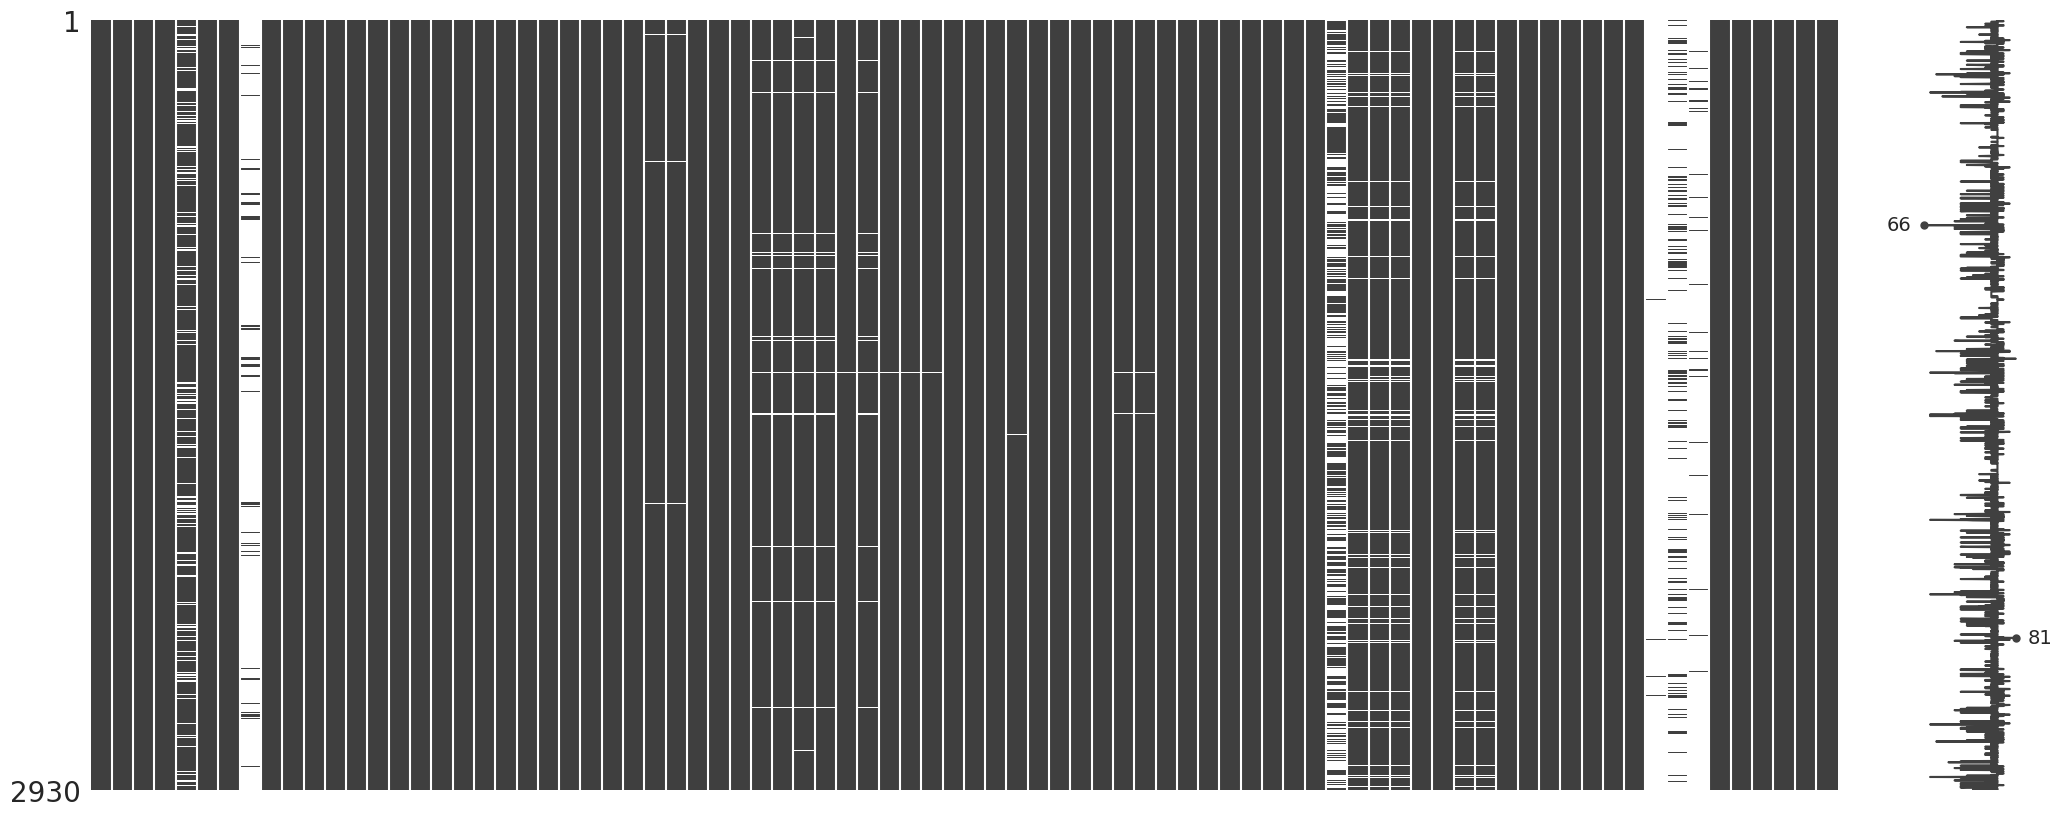

In [66]:
msno.matrix(df)

<Axes: >

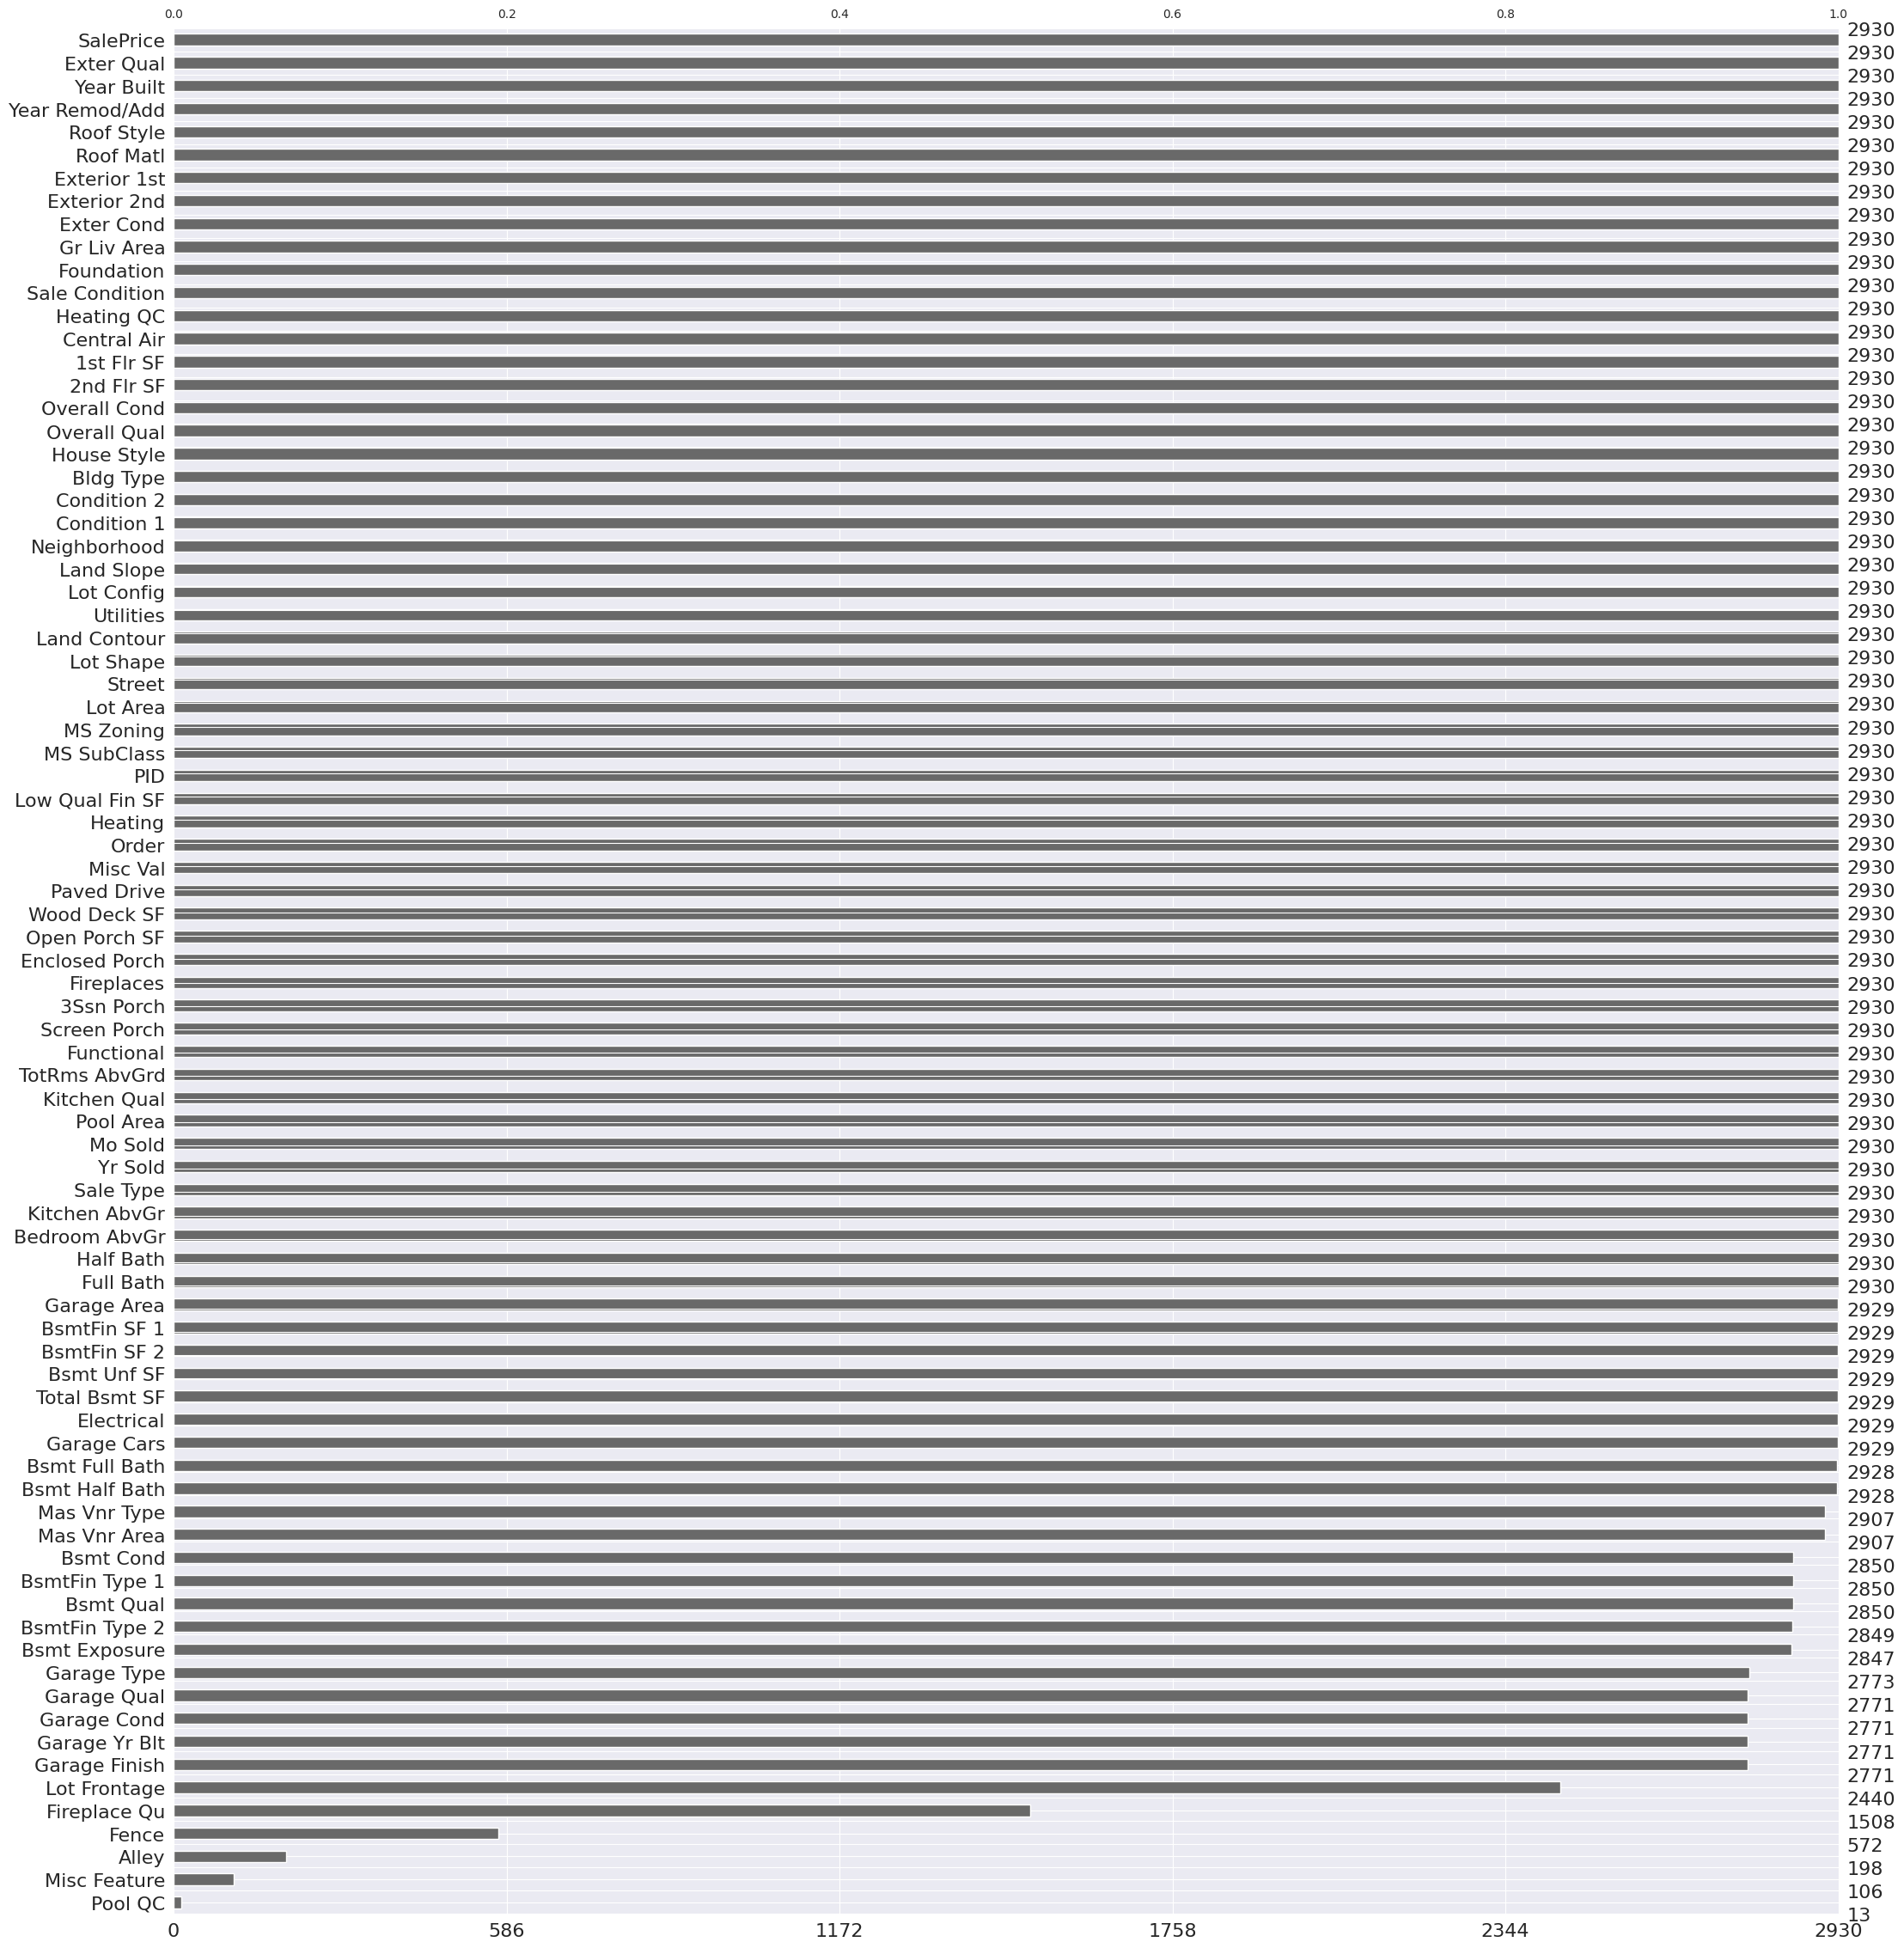

In [67]:
msno.bar(df, sort="ascending")

In [68]:
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# 3. séparation des jeux entre train et split pour ne pas avoir de data leaking

In [69]:
y = df["SalePrice"]
X = df.drop(["SalePrice"], axis =1)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. nettoyage de données

In [71]:
df = pd.concat((X_train,y_train), axis =1)
df.shape

(2344, 82)

## Valeurs maquantes

On supprime les colonnes inutiles ou avec trop de valeurs nulles

In [72]:
df = df.drop(["Order","PID","Alley","Fireplace Qu","Pool QC","Fence","Misc Feature"], axis=1)

In [73]:
df.shape

(2344, 75)

# 4. Analyse de données

In [74]:
df.iloc[:,0:15]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style
381,20,RL,80.0,10400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story
834,60,RL,NaN,28698,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,2Story
1898,90,RL,70.0,9842,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story
678,90,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story
700,190,RM,63.0,7627,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,2fmCon,2Story
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,190,RL,195.0,41600,Pave,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,Norm,Norm,2fmCon,1Story
1095,60,RL,NaN,7750,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story
1130,60,FV,64.0,8791,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story
1294,50,RM,81.0,7308,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin


In [75]:
cat_col = ['MS SubClass', 'MS Zoning',
        'Street','Lot Shape', 'Land Contour', 'Utilities',
        'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
        'Overall Cond', 'Roof Style',
        'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
        'Mas Vnr Type', 'Exter Qual',
        'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
        'BsmtFin Type 1',  'BsmtFin Type 2', 
        'Heating', 'Heating QC', 'Central Air',
        'Electrical',  'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
        'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
        'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
        'Garage Finish', 'Garage Cars', 
        'Garage Qual', 'Garage Cond', 'Paved Drive',  'Enclosed Porch', '3Ssn Porch',  'Mo Sold',  'Sale Type',
        'Sale Condition']

num_col = ['Lot Frontage', 'Lot Area','Year Built','Year Remod/Add', 'Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF',
        'Total Bsmt SF','1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
        'Gr Liv Area','Garage Yr Blt', 'Garage Area','Wood Deck SF',
        'Open Porch SF','Screen Porch',
        'Pool Area', 'Misc Val','Yr Sold', "Enclosed Porch", "3Ssn Porch",  'SalePrice']

## Analyse des variables quantitatives

In [76]:
def plot_histograms(col_list, df, nb_col, figsize, bins, font_label, font_titre):
    nb_row = df[col_list].shape[1] // nb_col
    fig, axs = plt.subplots(nb_row, nb_col, figsize=figsize)
    axs = axs.ravel()

    for i, col in enumerate(col_list):
        axs[i].set_title(f'Histogramme de {col}', fontsize=font_titre)
        axs[i].hist(df[col], bins=bins)
        axs[i].set_xlabel(col, fontsize=font_label)
        axs[i].tick_params(axis='x', rotation=45)

    for j in range(len(col_list), len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

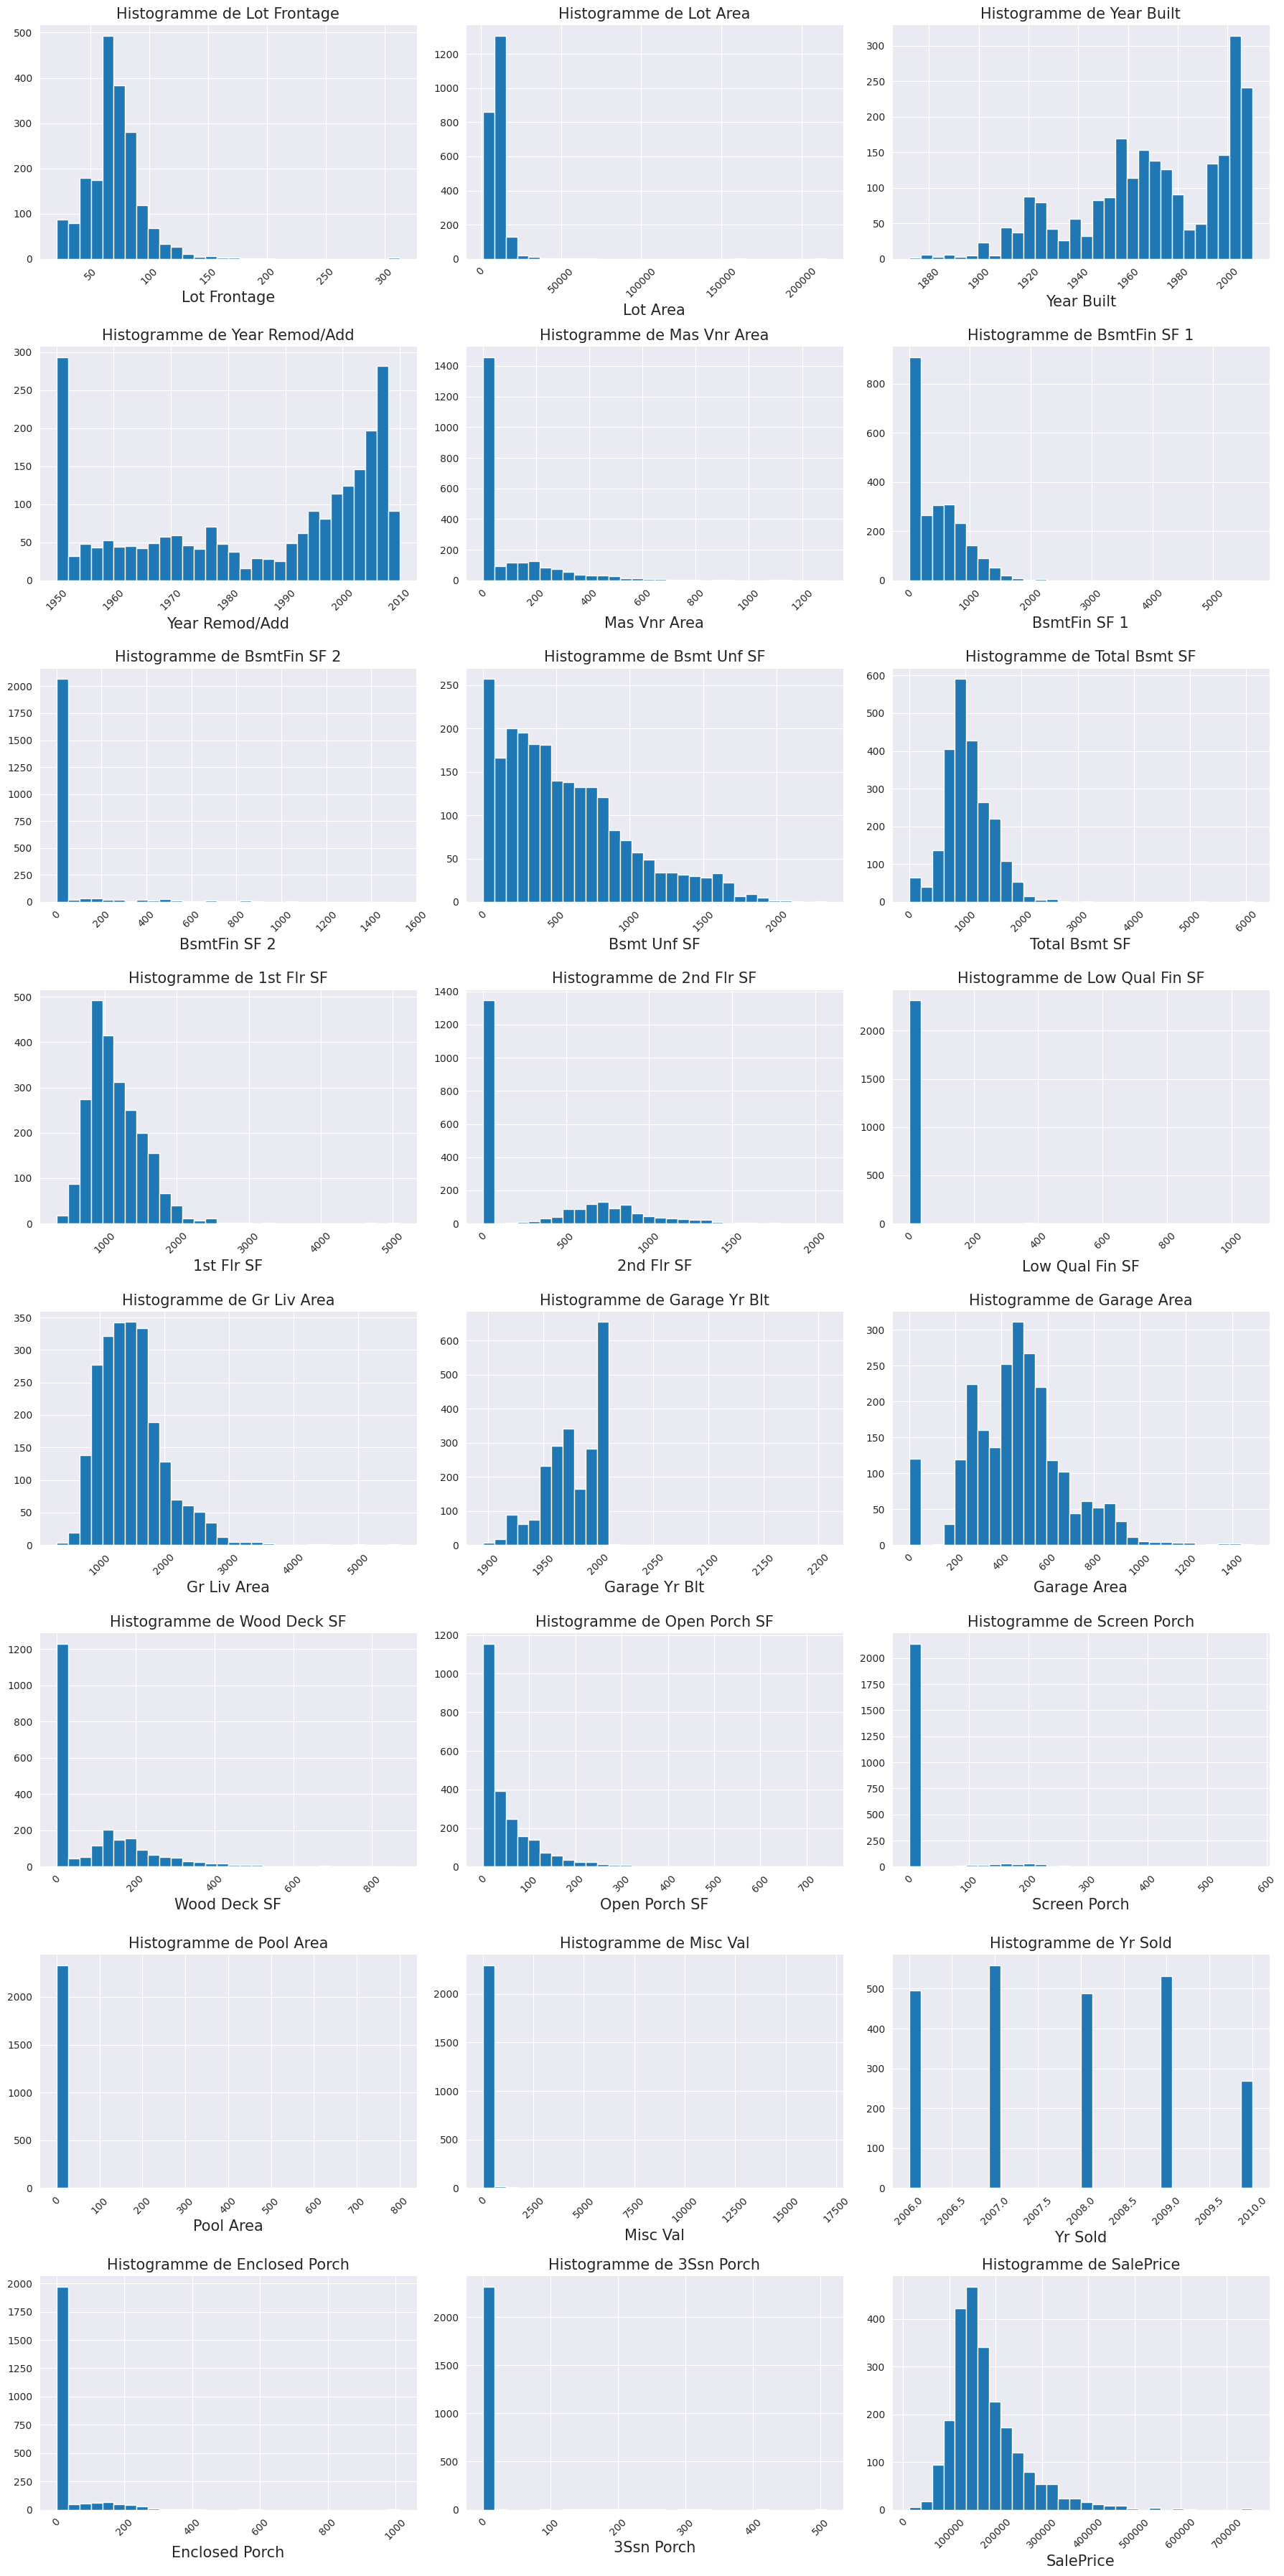

In [77]:
hauteur = (len(num_col))//3 + 1
taille = (18, hauteur)

plot_histograms(num_col, df, 3, figsize=(18,4*hauteur), bins=30, font_label=15, font_titre=15)


On supprimer les colonnes avec une valeur unique

In [78]:
to_drop = [ 'BsmtFin SF 2','Low Qual Fin SF', 'Open Porch SF','Screen Porch',
        'Pool Area', 'Misc Val', "3Ssn Porch"]

In [79]:
df= df.drop(to_drop,axis=1)

### Valeurs atypiques de la target "SalesPrice"

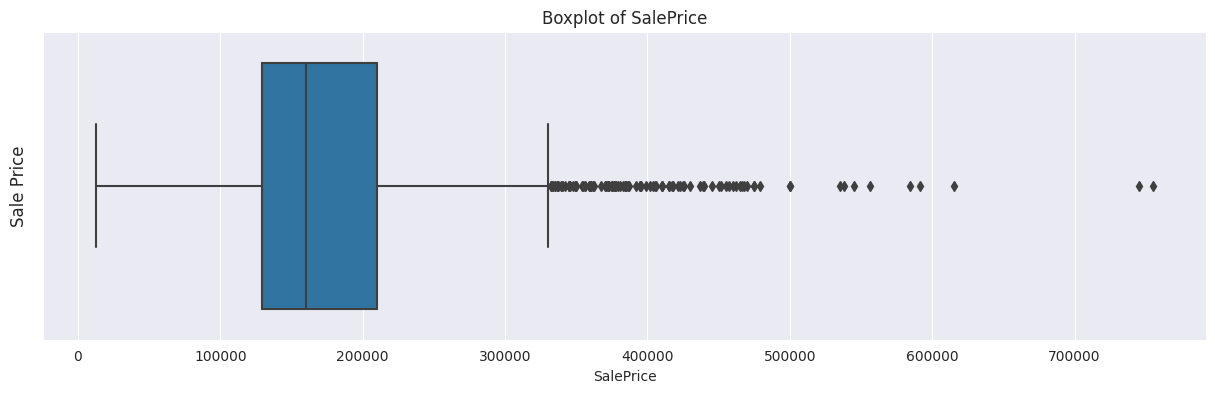

In [80]:
plt.figure(figsize=(15,4))
sns.boxplot(x=df['SalePrice'])  
plt.ylabel("Sale Price", fontsize=12)  
plt.title("Boxplot of SalePrice", fontsize=12)
plt.show()

Les données présentent une asymétrie positive causée par la présence d'un certain nombre d'outliers qui tirent la distribution vers la droite.

In [81]:
df[['SalePrice']].describe()

,SalePrice
count,2344.000000
mean,178582.207765
std,77125.072713
min,12789.000000
25%,129000.000000
50%,160000.000000
75%,210000.000000
max,755000.000000


Le boxplot de SalePrice montre qu'il existe des outliers, avec quelques valeurs extrêmes, cependant on remarque que la moyenne est assez proche de la médiane. Ainsi, ces quelques valeurs ont un impact léger sur la distribution. <br>
En appliquant une transformation logarithmique, la distribution se rapproche davantage de celle d'une loi normale.

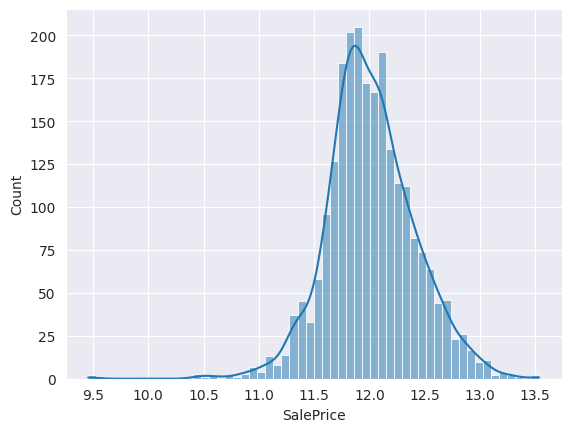

In [82]:
df_log = np.log(df[["SalePrice"]])
sns.histplot(data=df_log, x="SalePrice", kde=True)
plt.show()

On va donc s'intéresser aux outliers en appliquant un Z-score pour les sélectionner, on choisit pour seuil standard 3 écart types.

In [83]:
import numpy as np
import pandas as pd

mean = df['SalePrice'].mean()
std = df['SalePrice'].std()

# Calculer les Z-scores
df['Z_score'] = (df['SalePrice'] - mean) / std

# Définir le seuil Z-score (par exemple, 2 ou 3)
threshold = 3

# Identifier les outliers
outliers = df[abs(df['Z_score']) > threshold]


In [84]:
outliers.shape

(40, 69)

/tmp/ipykernel_16513/1476500895.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_16513/1476500895.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_16513/1476500895.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


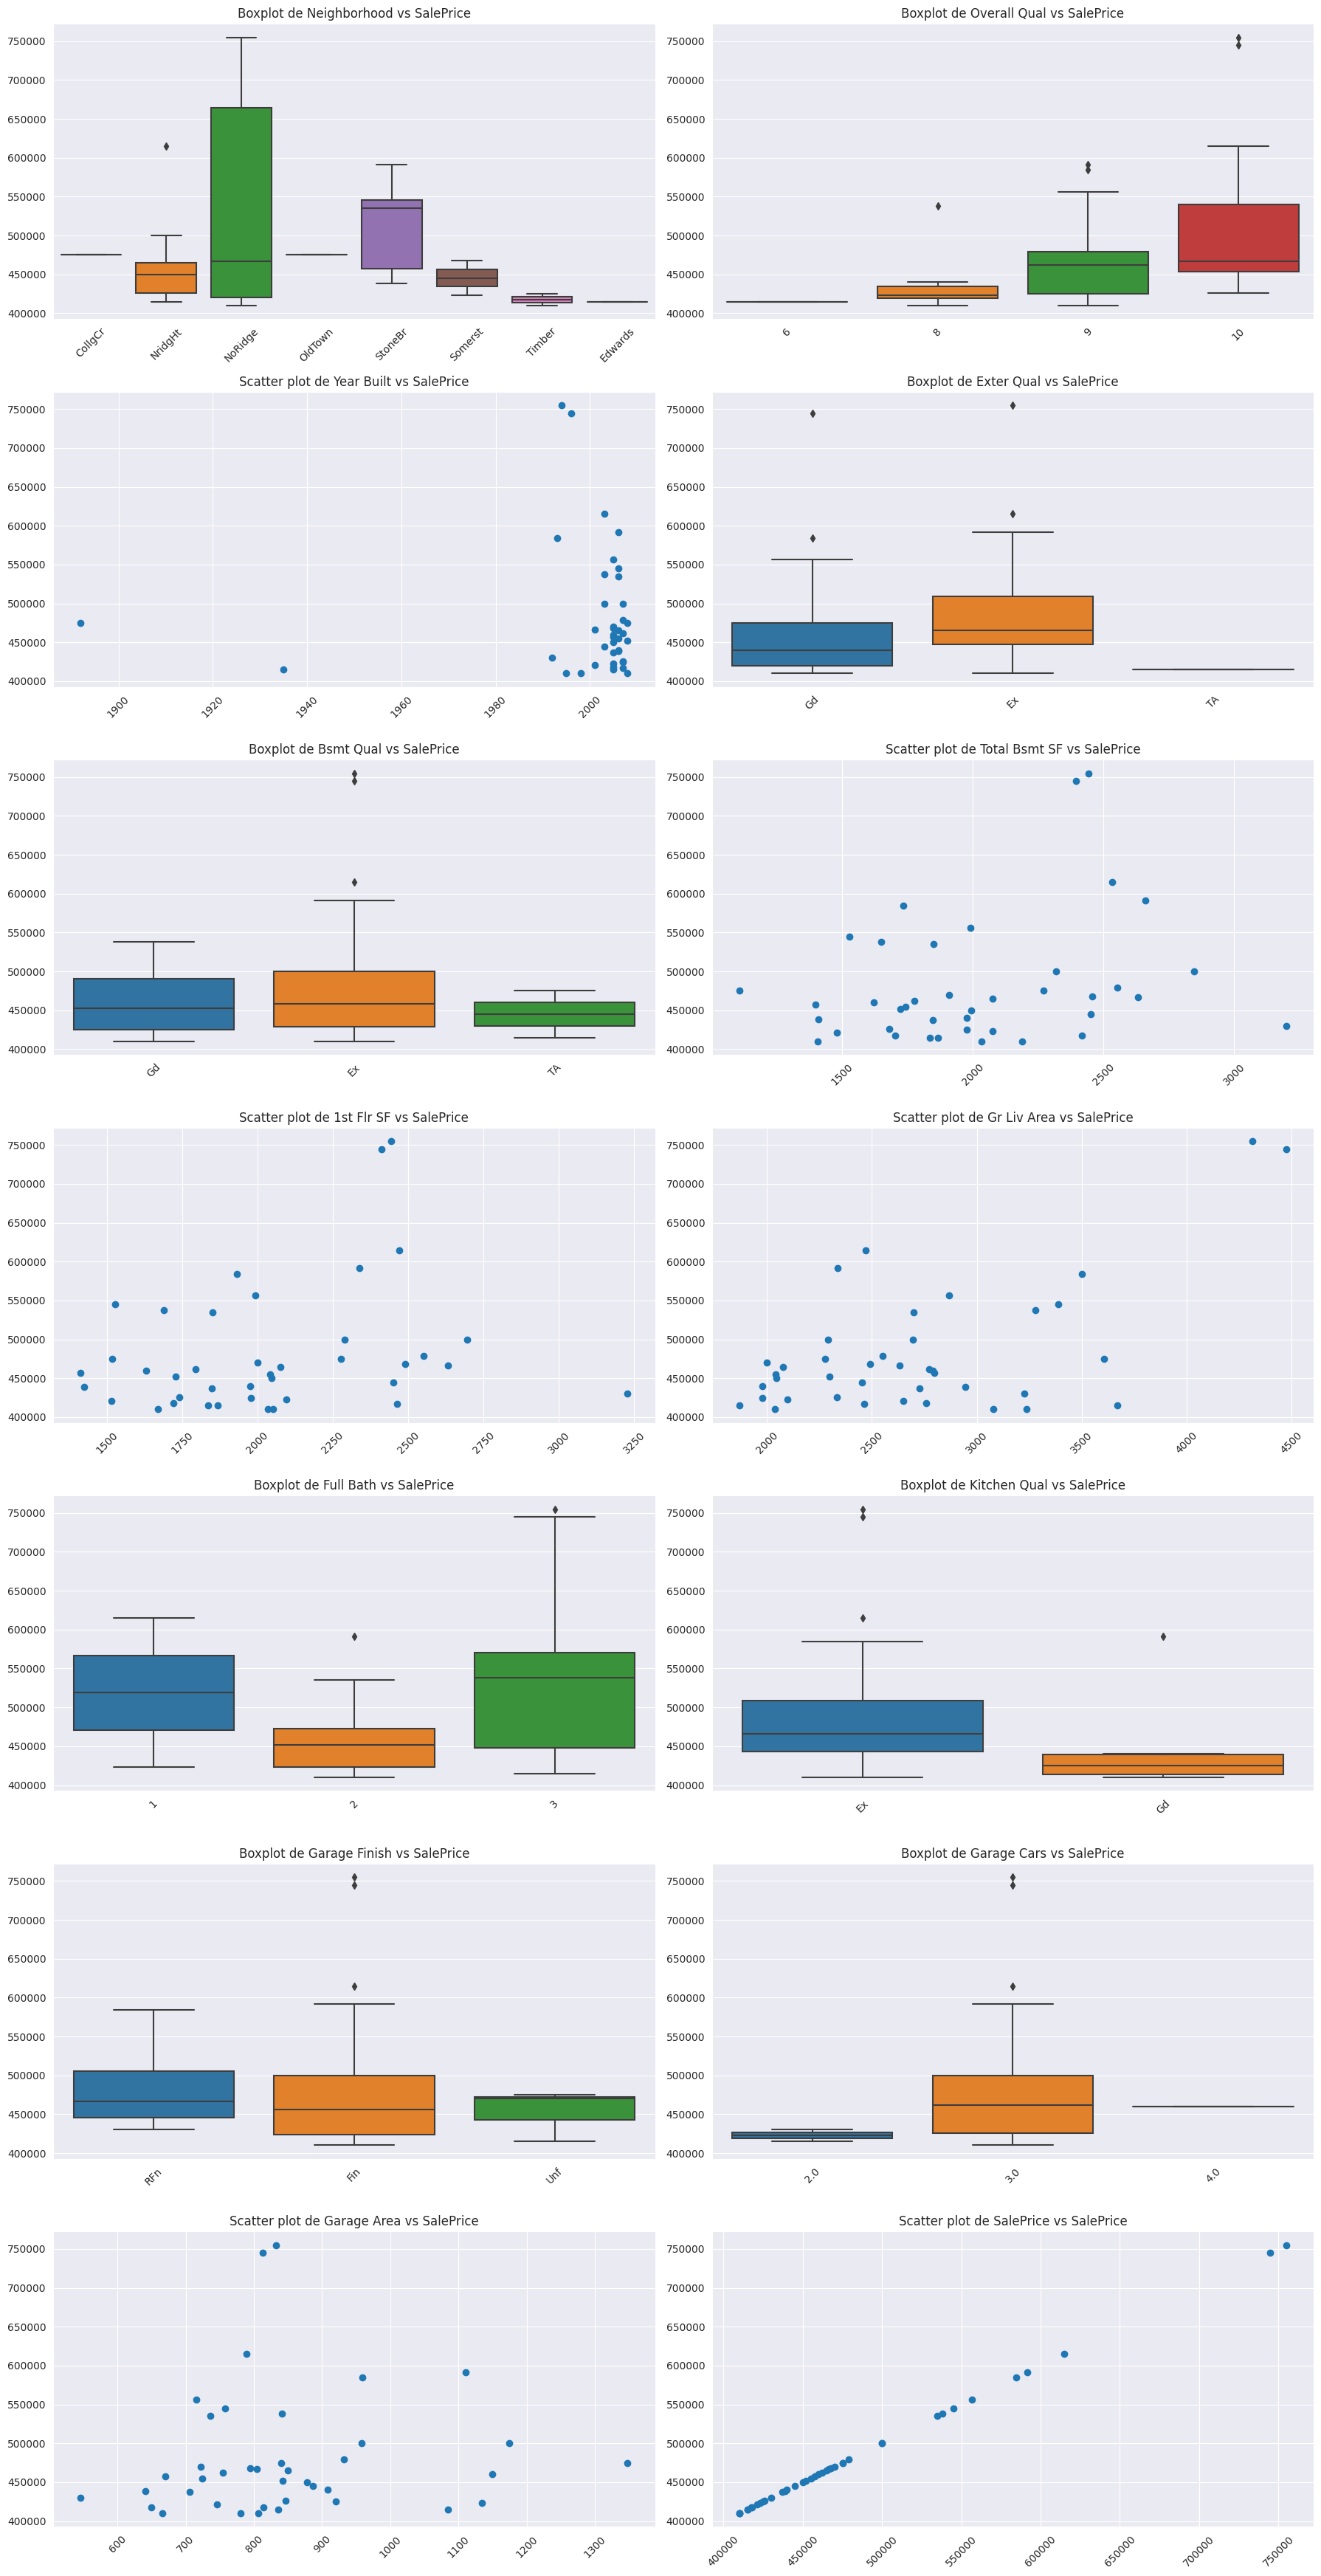

In [85]:
# On récupére ici la liste des colonness qui avaient été sélectionné initialement pour le modèle
sub_selection = ['Neighborhood', 'Overall Qual', 'Year Built',
       'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF','1st Flr SF', 
       'Gr Liv Area', 'Full Bath', 'Kitchen Qual',  'Garage Finish', 'Garage Cars',
       'Garage Area', 'SalePrice']

fig, axs = plt.subplots(7, 2, figsize=(18, 7*5))
axs = axs.ravel()

for i, col in enumerate(sub_selection):
    ax =axs[i]
    
    if len(outliers[col].unique()) < 10:
        sns.boxplot(data=outliers, x=col, y='SalePrice', ax=ax)
        ax.set_title(f'Boxplot de {col} vs SalePrice')
    else:
        ax.scatter(outliers[col], outliers['SalePrice'])  # Utilisez scatter directement sur ax
        ax.set_title(f'Scatter plot de {col} vs SalePrice')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

On constate que "Neighboorhood", "OverQuall", "Year Built", "Kitchen Qual" et "Garage Cars" ont particulièrement un impact sur la valeur "SalePrice".

In [86]:
outliers = outliers[sub_selection]
outliers[outliers['SalePrice']>700000]

,Neighborhood,Overall Qual,Year Built,Exter Qual,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,Garage Finish,Garage Cars,Garage Area,SalePrice
1760,NoRidge,10,1996,Gd,Ex,2396.0,2411,4476,3,Ex,Fin,3.0,813.0,745000
1767,NoRidge,10,1994,Ex,Ex,2444.0,2444,4316,3,Ex,Fin,3.0,832.0,755000


In [87]:
outliers[(outliers['SalePrice'] > 500000) & (outliers['SalePrice'] < 700000)].sort_values(by='SalePrice', ascending=False)

,Neighborhood,Overall Qual,Year Built,Exter Qual,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,Garage Finish,Garage Cars,Garage Area,SalePrice
1063,NridgHt,10,2003,Ex,Ex,2535.0,2470,2470,1,Ex,Fin,3.0,789.0,615000
1637,StoneBr,9,2006,Ex,Ex,2660.0,2338,2338,2,Gd,Fin,3.0,1110.0,591587
2450,NoRidge,9,1993,Gd,Ex,1733.0,1933,3500,3,Ex,RFn,3.0,959.0,584500
2332,StoneBr,9,2005,Gd,Ex,1992.0,1992,2868,3,Ex,Fin,3.0,716.0,556581
2330,StoneBr,10,2006,Ex,Ex,1528.0,1528,3390,3,Ex,Fin,3.0,758.0,545224
15,StoneBr,8,2003,Ex,Gd,1650.0,1690,3279,3,Ex,Fin,3.0,841.0,538000
2334,StoneBr,10,2006,Ex,Ex,1850.0,1850,2698,2,Ex,RFn,3.0,736.0,535000
1701,NridgHt,10,2007,Ex,Ex,2320.0,2290,2290,2,Ex,Fin,3.0,1174.0,500067


L'analyse des outliers montrent que les valeurs extrêmes ne sont pas des valeurs aberrantes mais atypiques, car on remarque que la combinaison de plusieurs caractéristiques expliquent ces valeurs élevées.

## Analyse des variables catégorielles

On commence par rechercher les colonnes dont la distribution est la plus déséquilibrée

On peut distinguer:
- les colonnes complétement déséquilibrées (une valeur pèse au moins 95%) : on les supprime
- les colonnes déséquilibrées (une valeur pèse au moins 85%): s'il n'y a pas d'écart significatif entre les moyennes de saleprice pour chaque catégorie, on les supprime également.

In [89]:
highly_unbalanced_col = ["Street","Utilities", "Condition 2","Roof Matl", "Heating", "Functional","Garage Qual","Garage Cond"]

unbalanced_col = ["Land Slope", "Land Contour", "Condition 1", "Bldg Type", "Exter Cond", "Bsmt Cond", 
            "BsmtFin Type 2", "Central Air", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]

In [90]:
def plot_column_proportions(col_list):
    num_cols = len(col_list)
    num_rows = (num_cols + 2) // 3  
    fig, axs = plt.subplots(num_rows, 3, figsize=(18, 4*num_rows))
    axs = axs.ravel()  
    
    for i, col in enumerate(col_list):
        proportions = df[col].value_counts(normalize=True)
        axs[i].bar(proportions.index, proportions.values)
        axs[i].set_title(f'Proportion des catégories pour {col}')
        axs[i].set_xlabel('Catégories')
        axs[i].set_ylabel('Proportion')
        axs[i].tick_params(axis='x', rotation=45)
        

    for j in range(len(col_list), len(axs)):
        axs[j].axis('off')
        
    plt.tight_layout()
    plt.show()

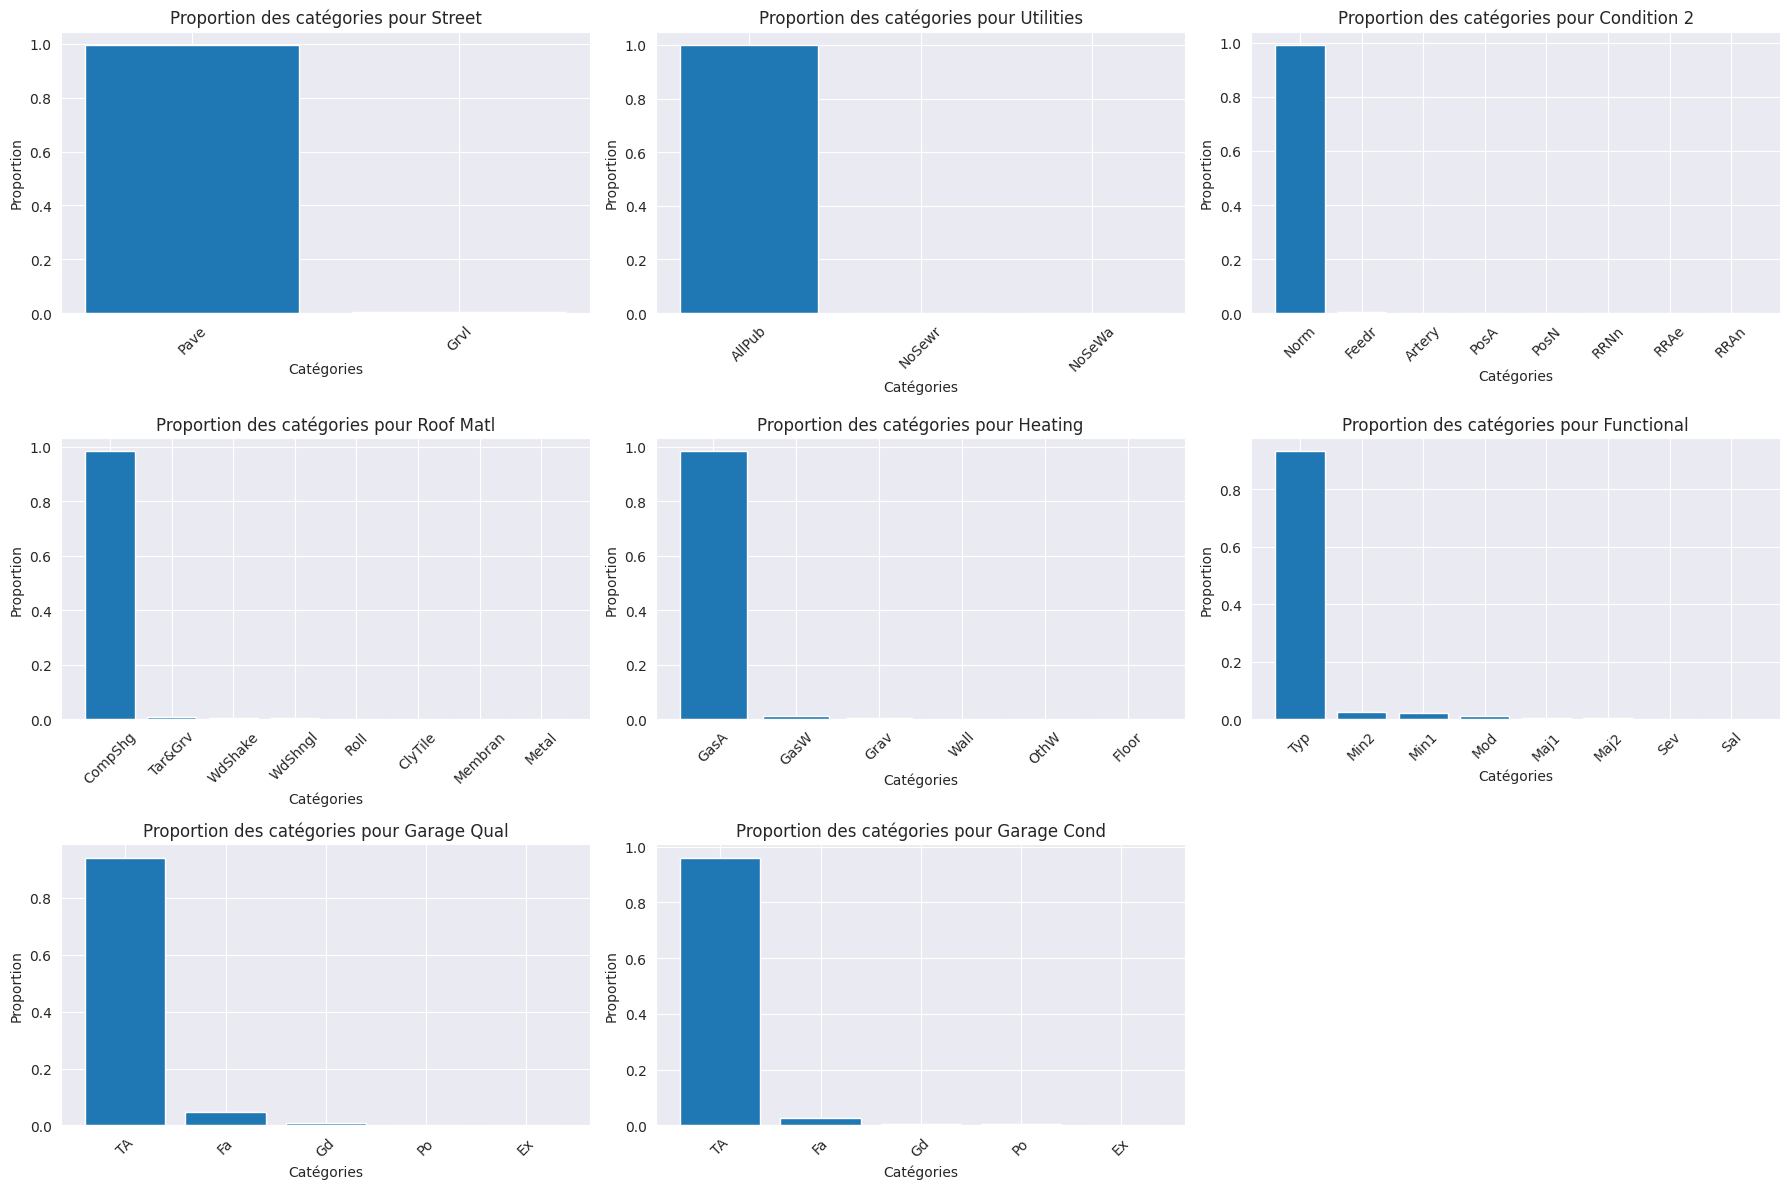

In [91]:
plot_column_proportions(highly_unbalanced_col)

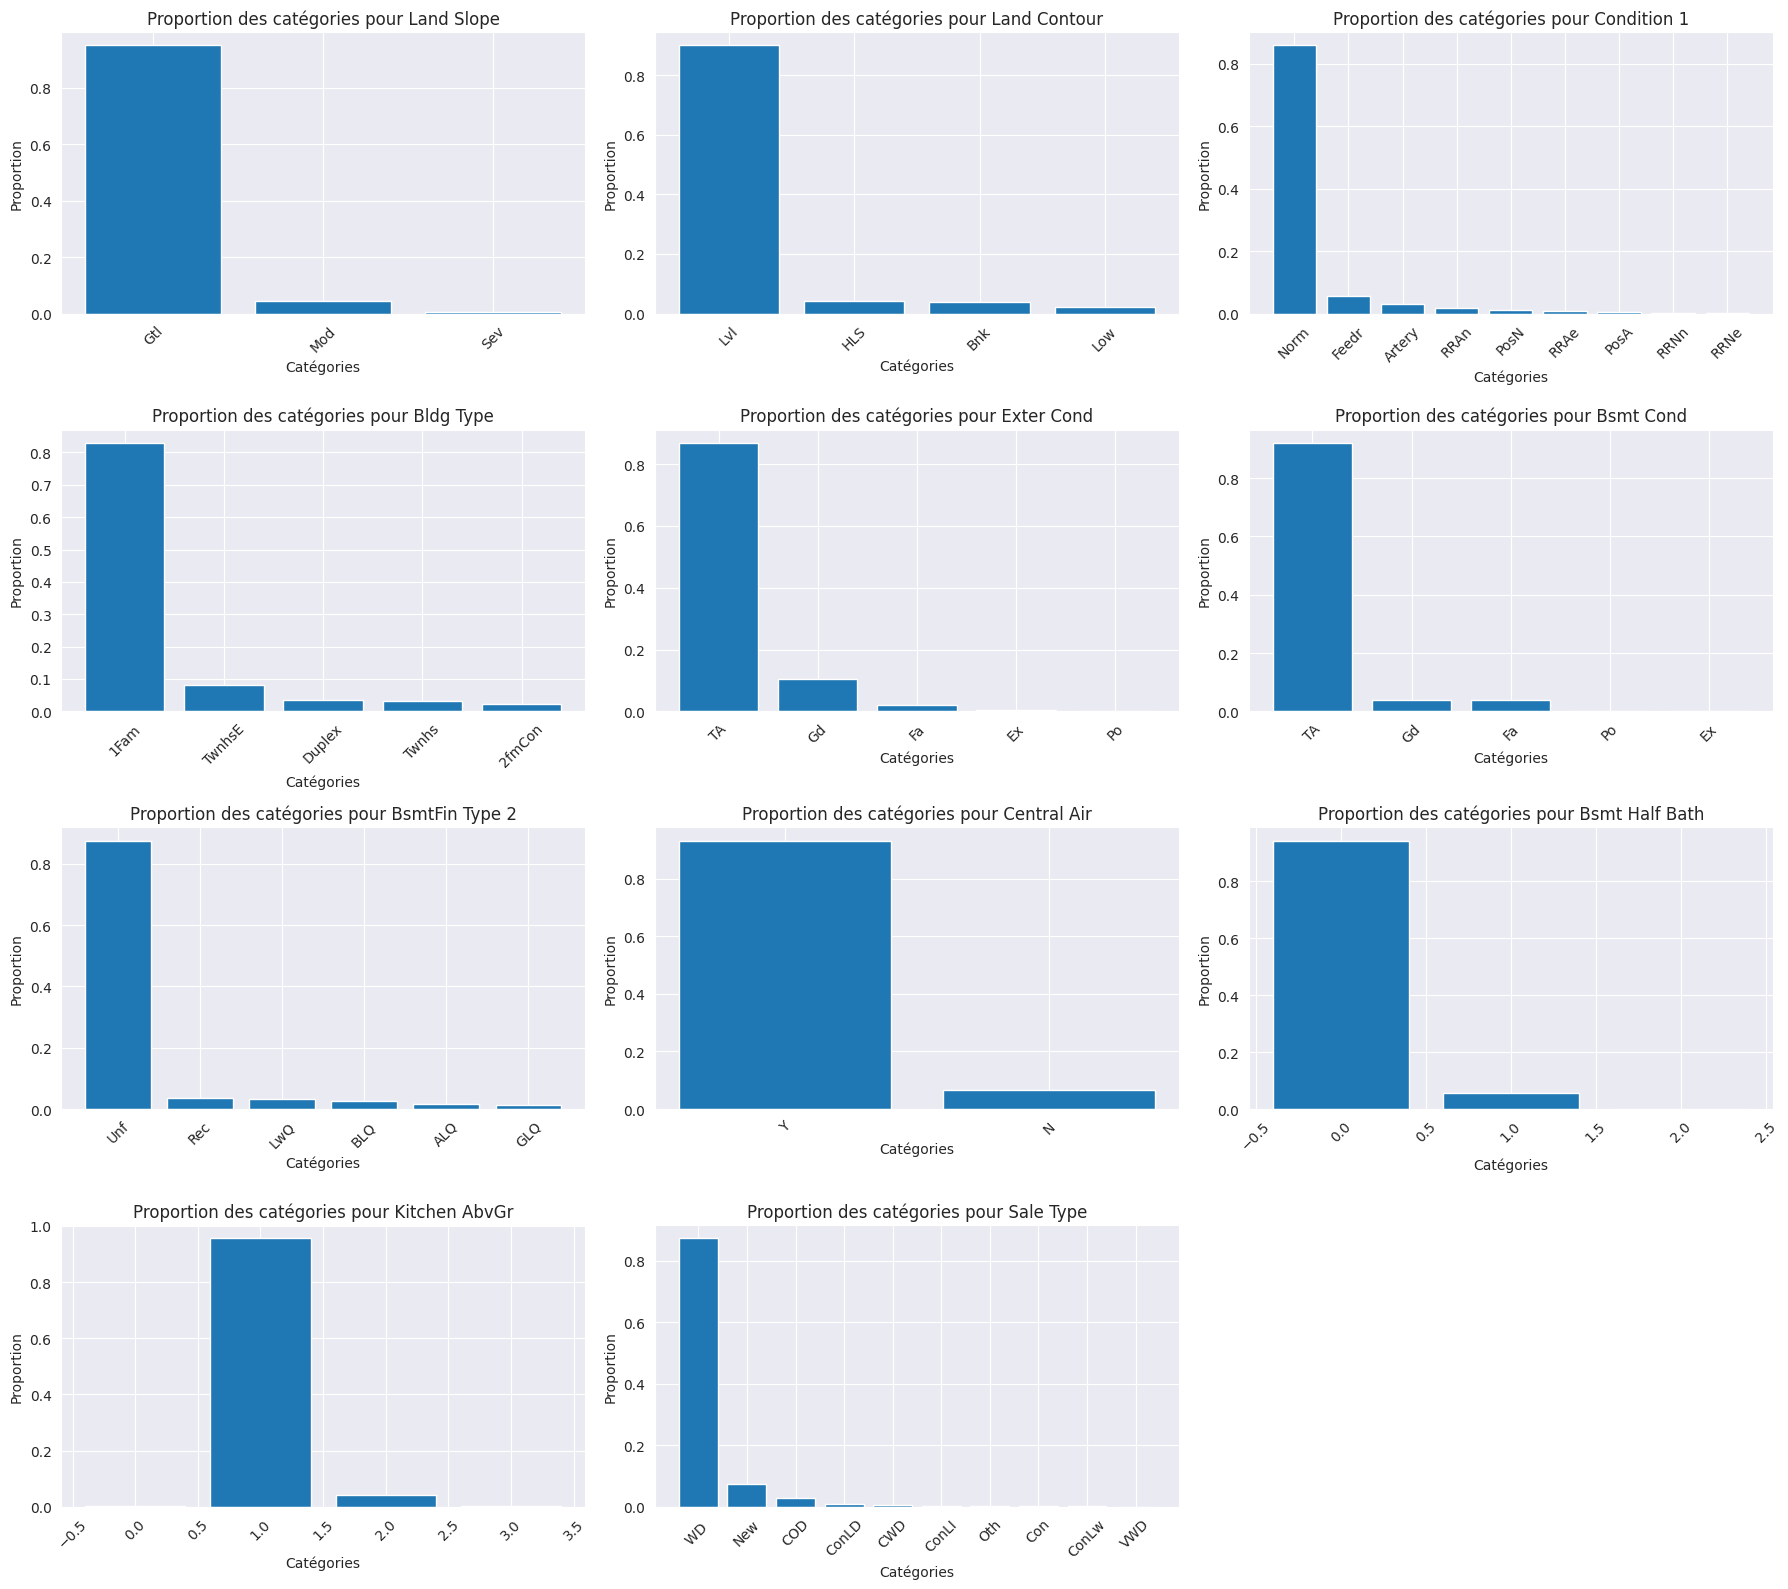

In [92]:
plot_column_proportions(unbalanced_col)

In [93]:
df = df.drop(highly_unbalanced_col, axis=1)

In [94]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Paved Drive', 'Wood Deck SF',
       'Enclosed Porch', 'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition',
       'S

In [95]:
df[["Land Slope", "SalePrice"]].groupby(by="Land Slope").mean()


,SalePrice
Land Slope,
Gtl,177242.725314
Mod,204352.676471
Sev,203995.000000


In [96]:
def plot_mean(col_list, df, nb_col, figsize, font_label=15, font_titre=15):
    nb_row = len(col_list) // nb_col +1
    fig, axs = plt.subplots(nb_row, nb_col, figsize=figsize)
    axs = axs.ravel()

    for i, col in enumerate(col_list):
        
        effectif = df[col].value_counts().apply(lambda x: 100*x)
        effectif_sorted = effectif.sort_values(ascending=False)

        grouped_data = df[[col, "SalePrice"]].groupby(col).mean().loc[effectif_sorted.index]
        
        axs[i].bar(grouped_data.index, grouped_data["SalePrice"])
        axs[i].plot(effectif_sorted, color='red', marker='x', linestyle='-', linewidth=2, label='Effectif (x100)')
        axs[i].set_xlabel(col, fontsize=font_label)
        axs[i].tick_params(axis='x', rotation=45)


    if len(axs) > len(col_list):
        for j in range(len(col_list), len(axs)):
            axs[j].axis('off')

    plt.tight_layout()
    plt.show()

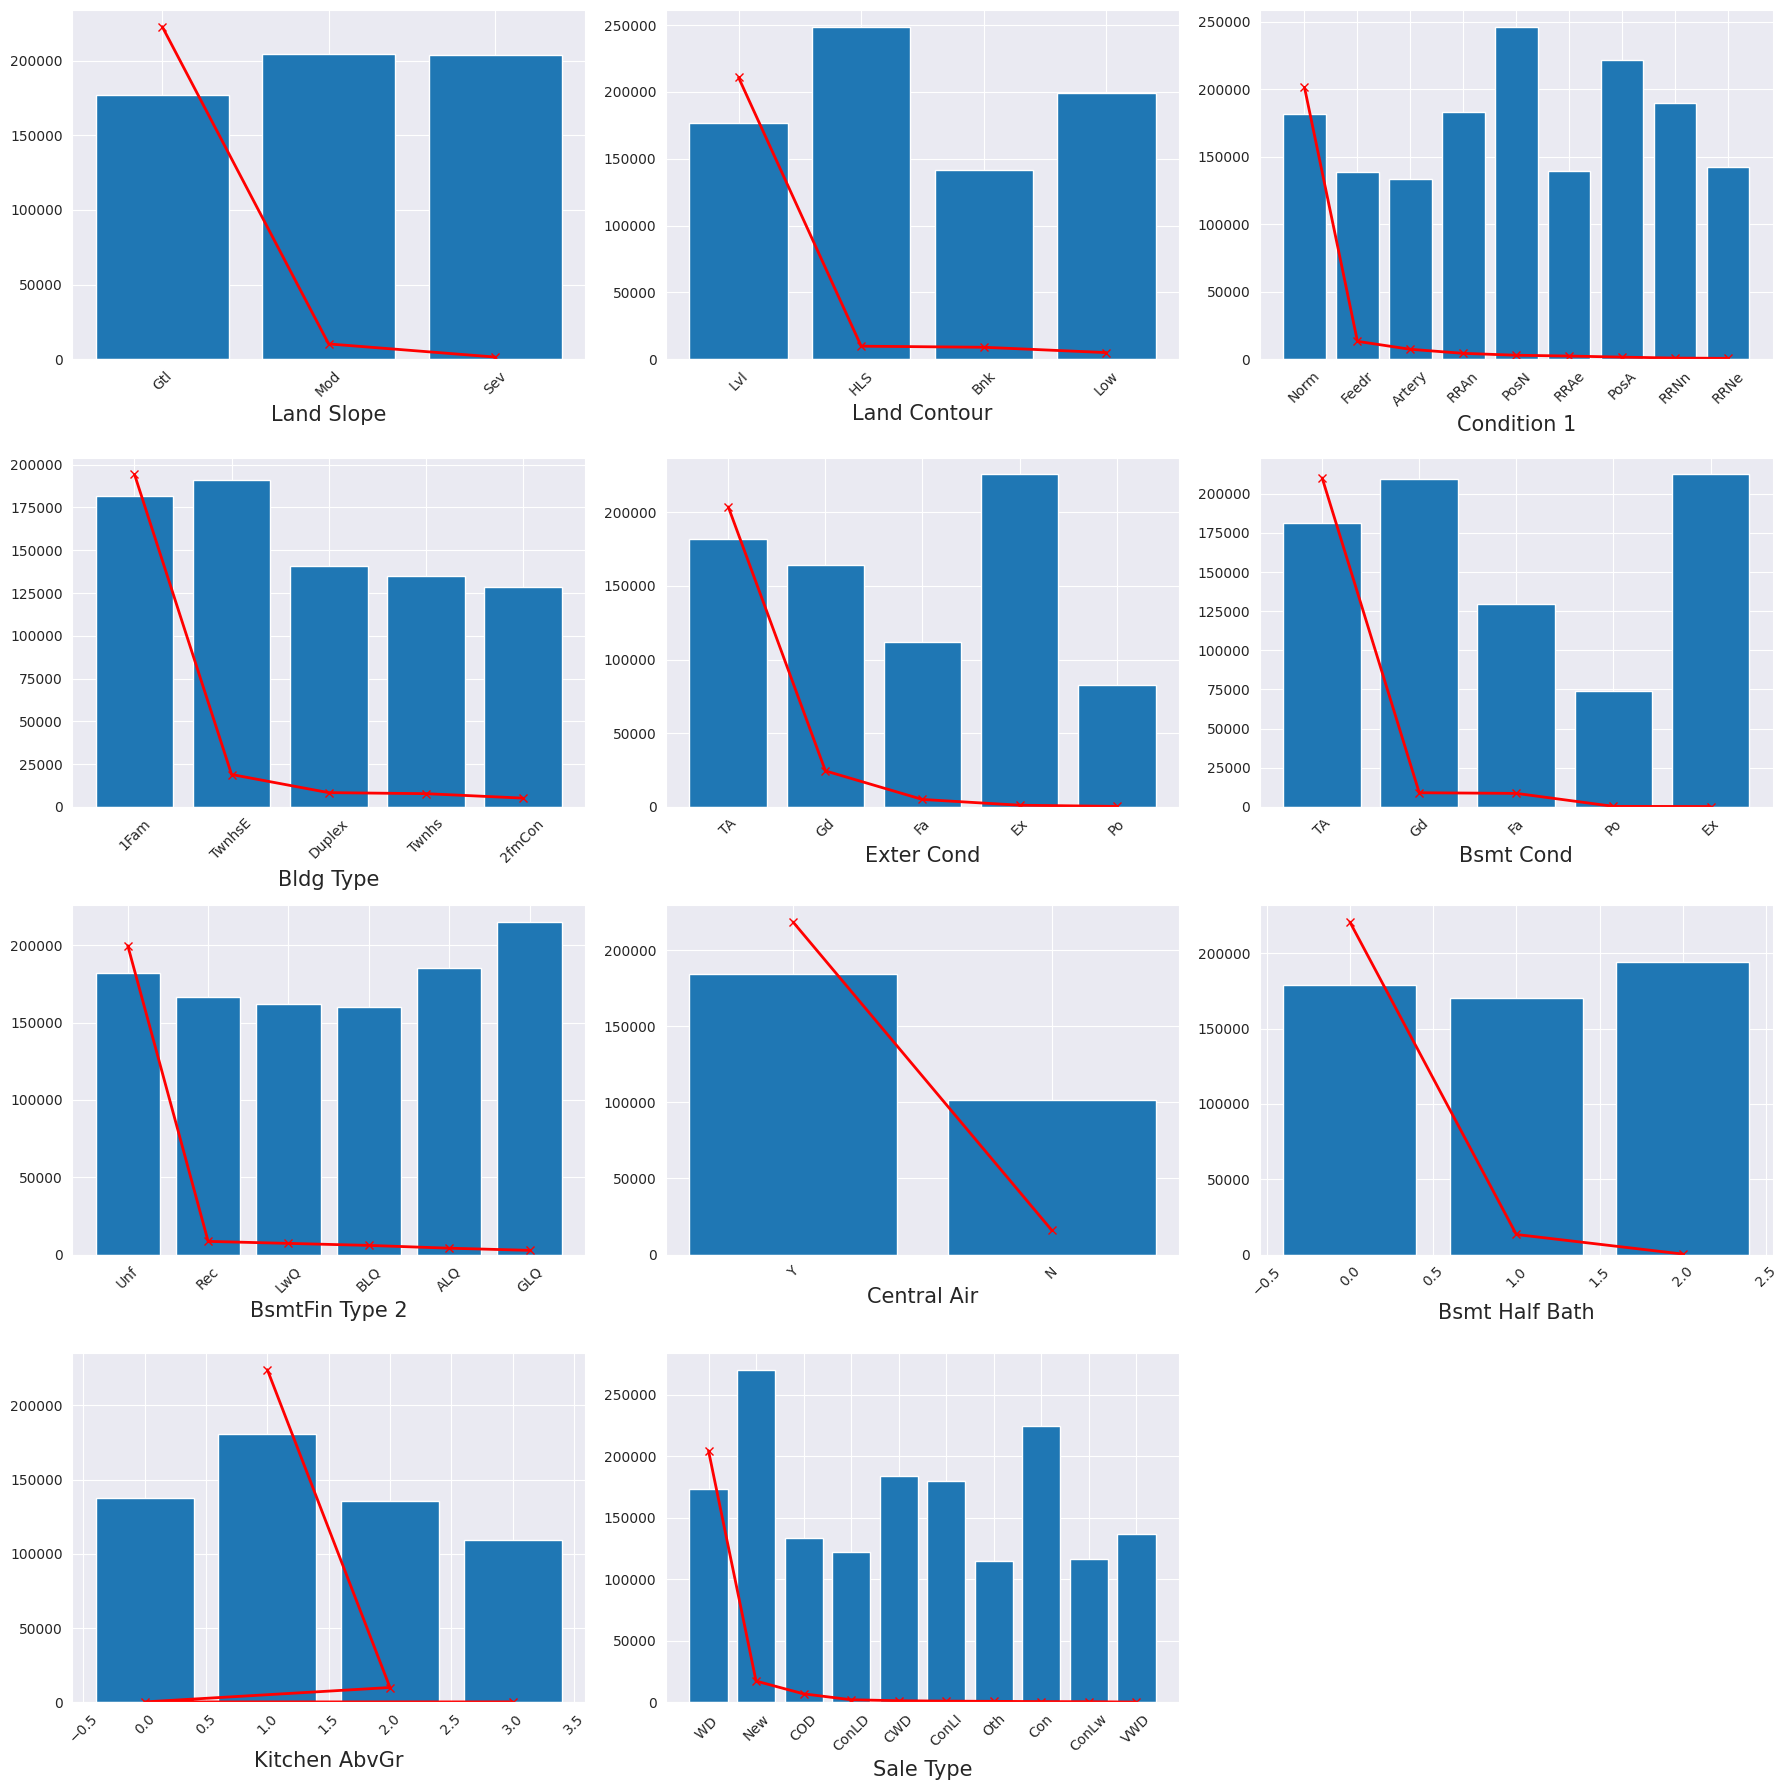

In [97]:
hauteur = (len(num_col)) // 3 + 1
taille = (18, 2*hauteur)

plot_mean(unbalanced_col, df, nb_col=3, figsize=taille)

In [98]:
to_keep = [ "Land Contour", "Bldg Type", "Exter Cond", "Bsmt Cond",  "Central Air"]
to_drop =  ["Land Slope",  "Condition 1", "BsmtFin Type 2", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]
df = df.drop(to_drop, axis=1)

## Analyse des corrélations

In [99]:
df.shape

(2344, 55)

In [100]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

In [101]:
complete_correlation= associations(df,compute_only=True)

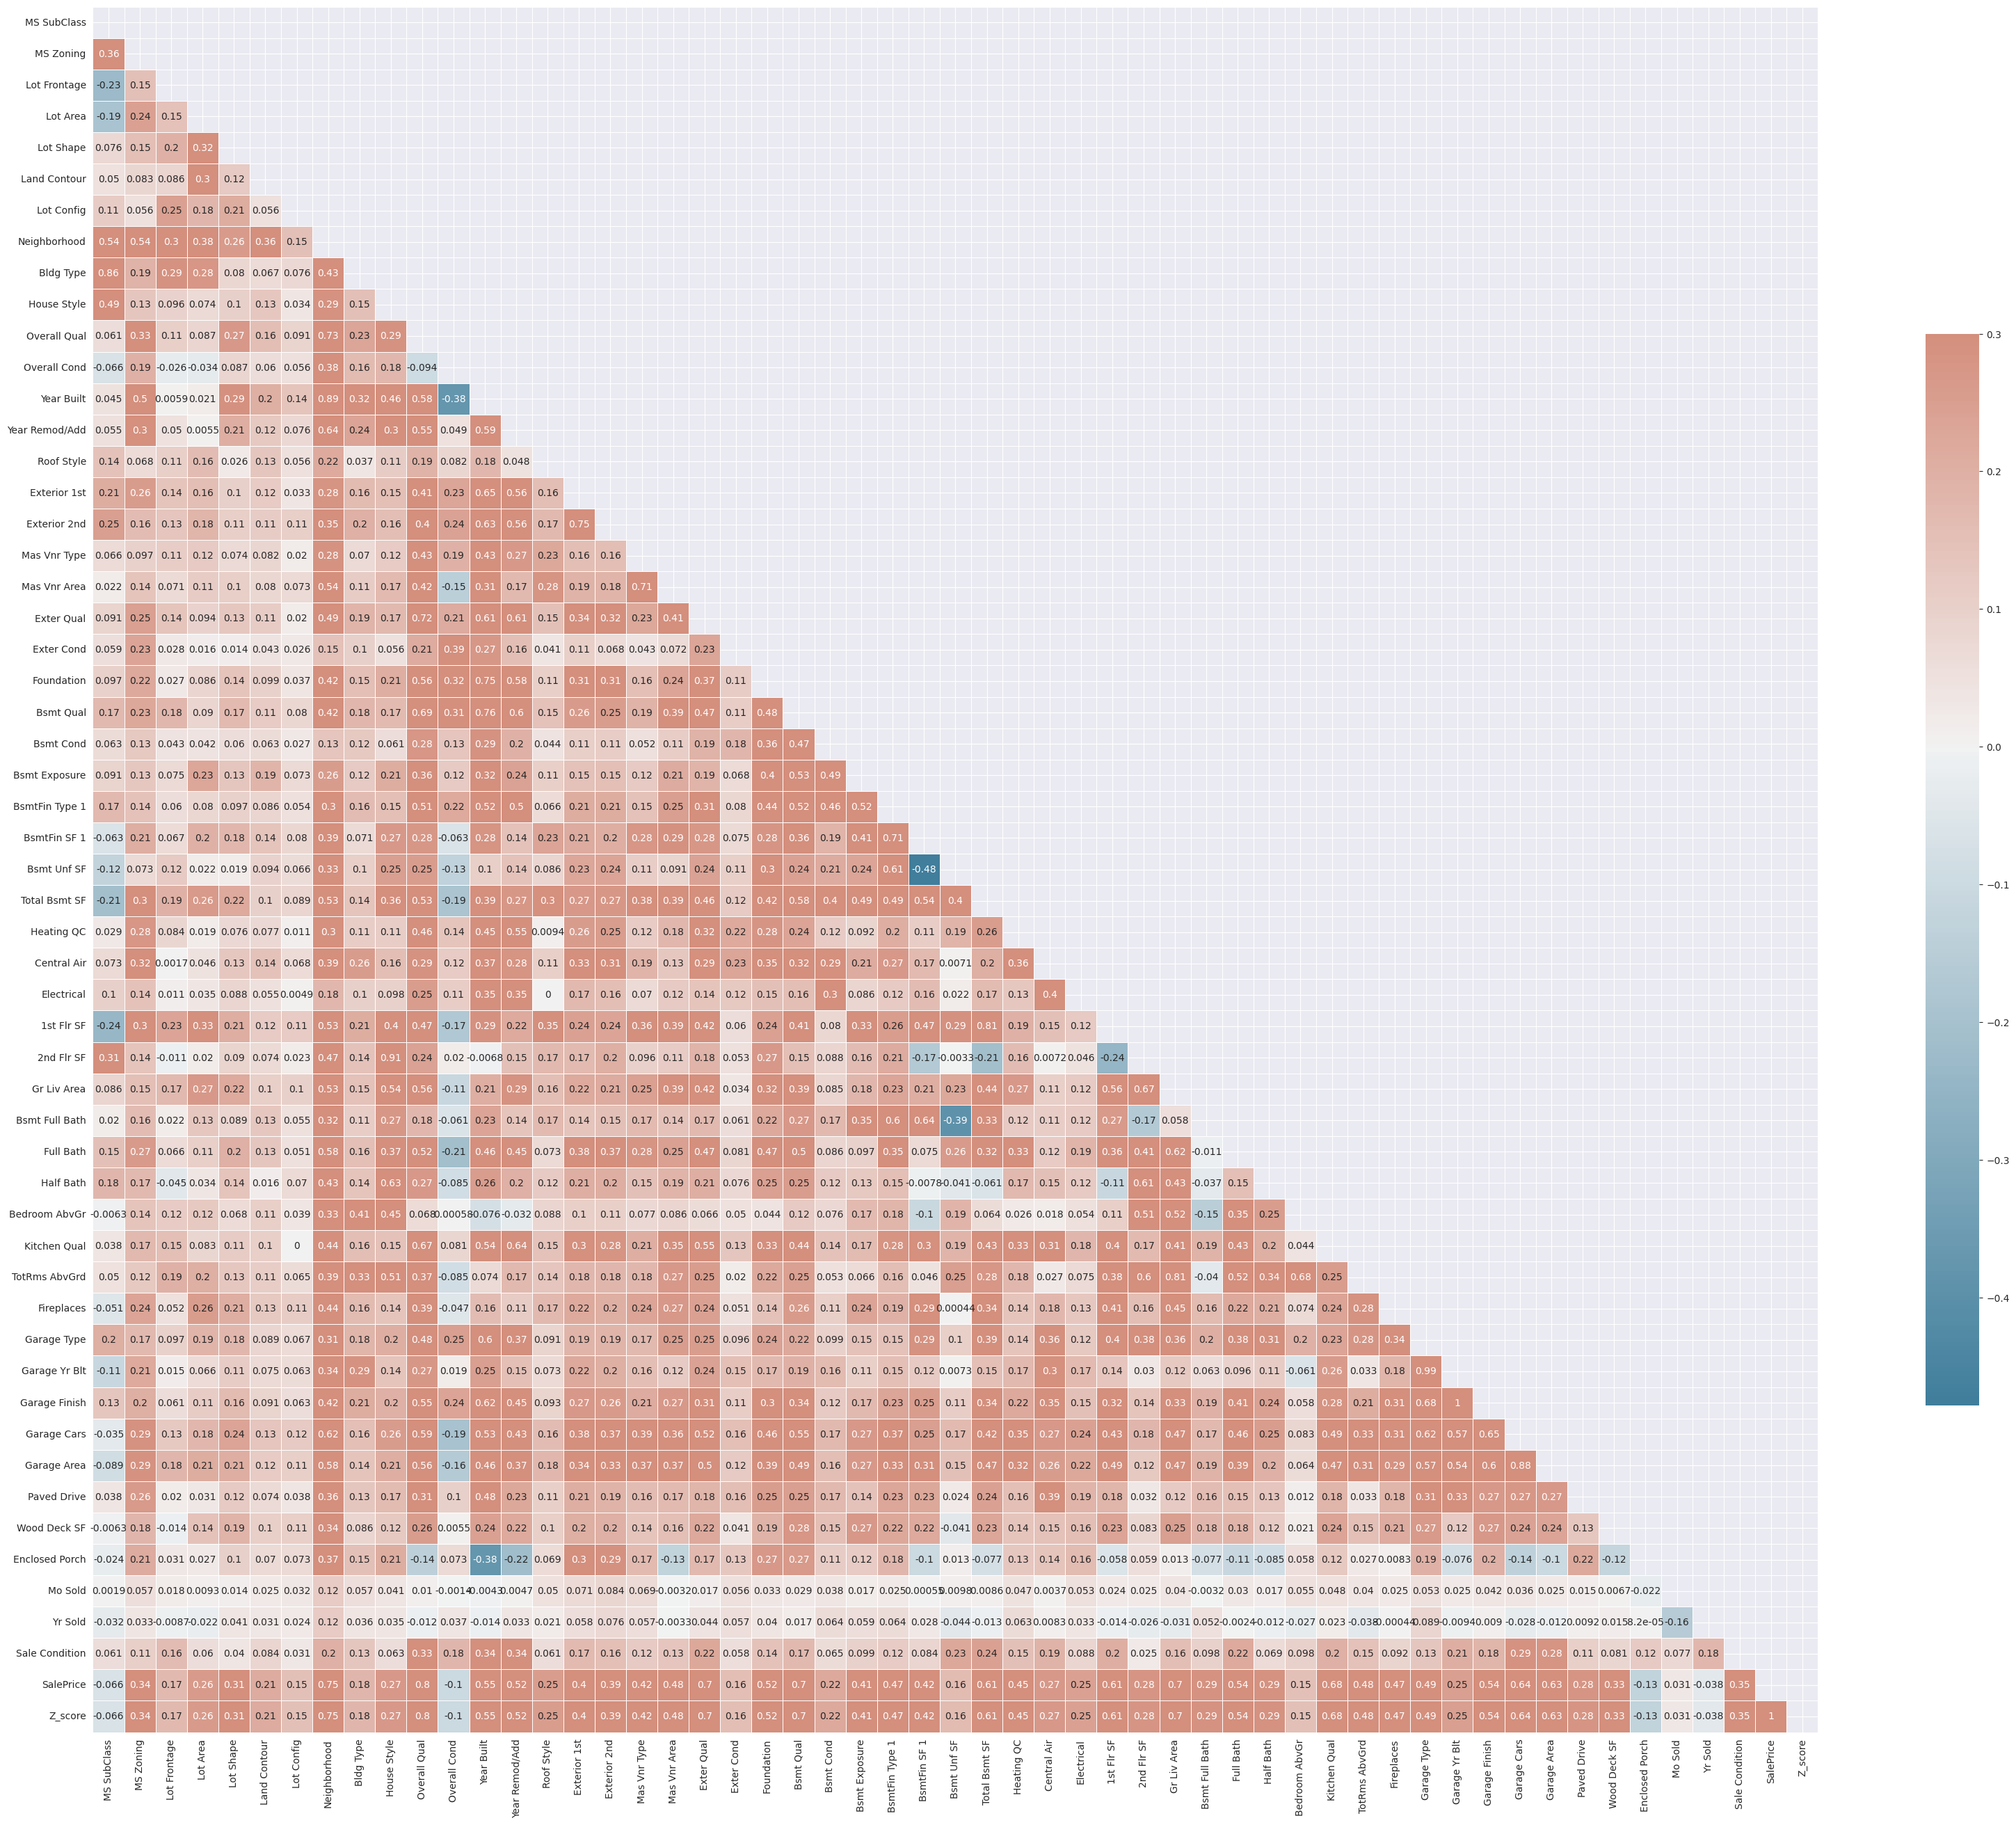

In [102]:
mask = np.triu(np.ones_like(complete_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(complete_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig("corr_matrice.png")

In [103]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Enclosed Porch',
       'Mo Sold', 'Yr Sold', 'Sale Condition', 'SalePrice', 'Z_score'],
      dtype='object')

In [104]:
sub_selection = ['Neighborhood', 'Overall Qual', 'Year Built',
       'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF','1st Flr SF', 
       'Gr Liv Area', 'Full Bath', 'Kitchen Qual',  'Garage Finish', 'Garage Cars',
       'Garage Area', 'SalePrice']

In [105]:
df_sub_selection = df[sub_selection]

<Axes: >

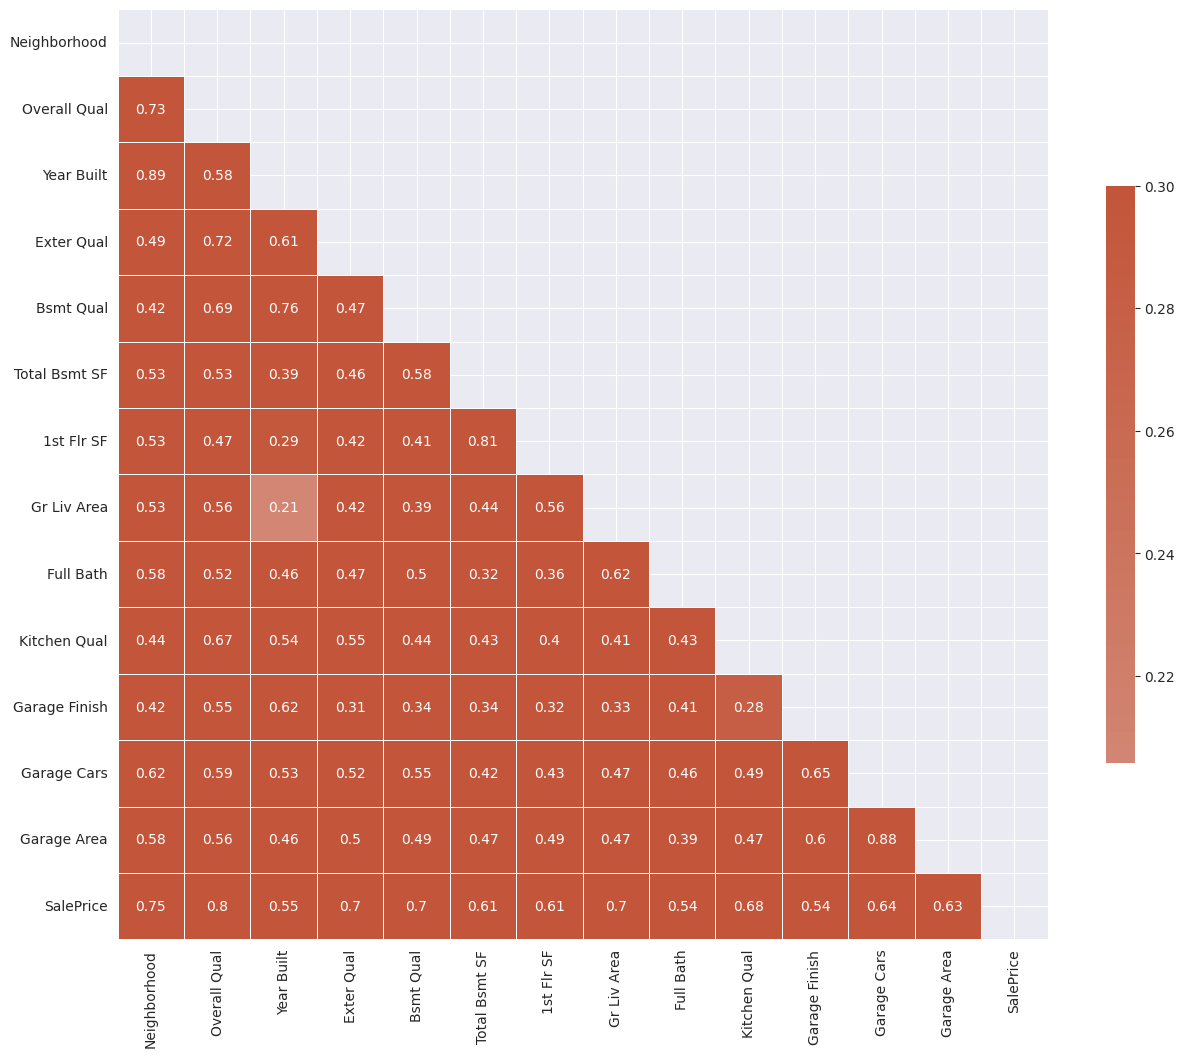

In [106]:
sub_correlation= associations(df_sub_selection,compute_only=True)
mask = np.triu(np.ones_like(sub_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sub_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})


On voit que beaucoup de variables sont corrélées entre elles. On va s'orienter vers un modèle selectif pour pouvoir exclure les variables trop corrélées.

# Préparation des données en vue du modèle

In [107]:
num_selected = ["Year Built", "Total Bsmt SF", "1st Flr SF", "Gr Liv Area", "Garage Area", "SalePrice"]
cat_num = ["Overall Qual", "Full Bath", "Garage Cars"]
cat_str = ["Neighborhood", "Exter Qual", "Bsmt Qual", "Kitchen Qual", "Garage Finish"]

In [108]:
df[num_selected].isna().sum()

Year Built       0
Total Bsmt SF    1
1st Flr SF       0
Gr Liv Area      0
Garage Area      1
SalePrice        0
dtype: int64

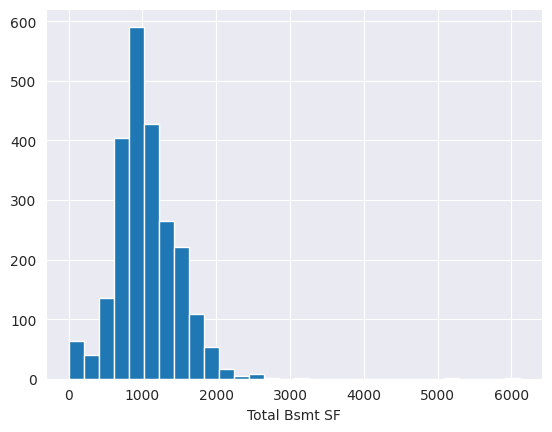

In [109]:
plt.figure()
plt.hist(x=df["Total Bsmt SF"], bins=30)
plt.xlabel("Total Bsmt SF")
plt.show()

In [110]:
df["Total Bsmt SF"].mean()

1047.0221937686727

In [111]:
df["Total Bsmt SF"].fillna(1052, inplace=True)

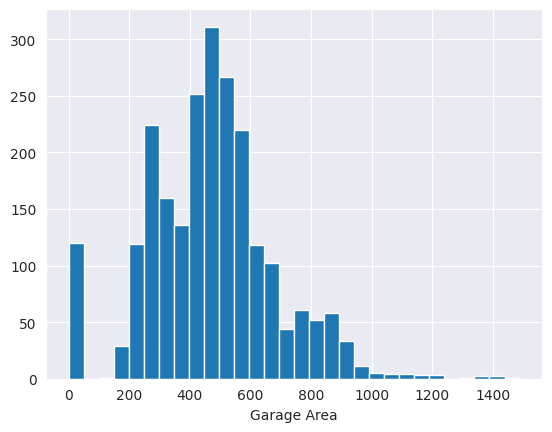

In [112]:
plt.figure()
plt.hist(x=df["Garage Area"], bins=30)
plt.xlabel("Garage Area")
plt.show()

In [113]:
df["Garage Area"].mean()

469.07895860008534

In [114]:
df["Garage Area"].fillna(472, inplace=True)

In [115]:
df[cat_num].isna().sum()

Overall Qual    0
Full Bath       0
Garage Cars     1
dtype: int64

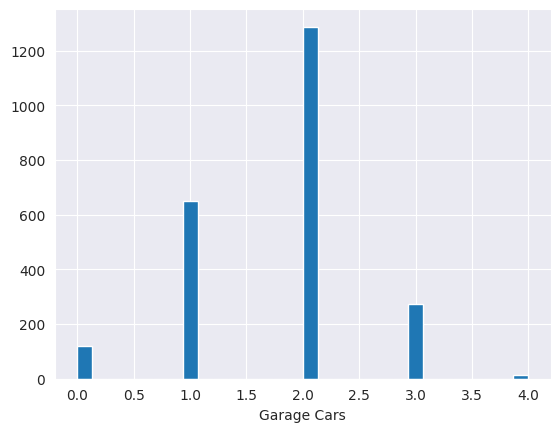

In [116]:
plt.figure()
plt.hist(x=df["Garage Cars"], bins=30)
plt.xlabel("Garage Cars")
plt.show()

In [117]:
df["Total Bsmt SF"].fillna(2, inplace=True)

In [118]:
df[cat_str].isna().sum()

Neighborhood       0
Exter Qual         0
Bsmt Qual         61
Kitchen Qual       0
Garage Finish    122
dtype: int64

In [119]:
df["Bsmt Qual"].value_counts()

TA    1057
Gd     970
Ex     187
Fa      67
Po       2
Name: Bsmt Qual, dtype: int64

In [120]:
df["Bsmt Qual"].fillna("TA", inplace=True)

In [121]:
df["Garage Finish"].value_counts()

Unf    997
RFn    654
Fin    571
Name: Garage Finish, dtype: int64

In [122]:
df["Bsmt Qual"].fillna("Unf", inplace=True)